In [11]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import warnings
from collections import OrderedDict
warnings.filterwarnings('ignore')
figsize = (10,6)
ylim = (0, 1020)

In [64]:
def plot_best_train_runs(best_dqn_full, best_dqn_partial, best_drqn_full, best_drqn_partial, goal):
    file_name_dict = [best_dqn_full, best_dqn_partial, best_drqn_full, best_drqn_partial]
    fig, ax = plt.subplots(nrows=2, ncols=2, figsize=figsize)
    axs = ax.ravel()
    for i in range(4):
        df = pd.read_csv(file_name_dict[i]['train'], delim_whitespace=True, index_col=0)
        axs[i].set_color_cycle(['red', 'blue', 'green'])
        x_end = df.shape[0]
        if i == 0:
            ttl = 'DQN Fully Observable'
        elif i == 1:
            ttl = 'DQN Partially Observable'
        elif i == 2:
            ttl = 'DRQN Fully Observable'
        elif i == 3:
            ttl = 'DRQN Partially Observable'
        axs[i].plot(df['average_reward'], label='Episode Average Reward')
        axs[i].plot(df['reward'], label='Episode Reward', alpha=0.2)
        axs[i].plot([0, x_end], [goal, goal], label='Goal Average Reward')
        axs[i].set_xlim((0,x_end))
        axs[i].set_ylim(ylim)
        axs[i].title.set_text(ttl)
    plt.tight_layout(pad=2)
    plt.legend(bbox_to_anchor=(0.3, 3), fontsize=15)
    plt.show()
    
def plot_best_test_runs(best_dqn_full, best_dqn_partial, best_drqn_full, best_drqn_partial, goal):
    file_name_dict = [best_dqn_full, best_dqn_partial, best_drqn_full, best_drqn_partial]
    fig, ax = plt.subplots(nrows=2, ncols=2, figsize=figsize)
    axs = ax.ravel()
    for i in range(4):
        df = pd.read_csv(file_name_dict[i]['test'], delim_whitespace=True, index_col=0)
        axs[i].set_color_cycle(['blue', 'green'])
        x_end = df.shape[0]
        if i == 0:
            ttl = 'DQN Fully Observable'
        elif i == 1:
            ttl = 'DQN Partially Observable'
        elif i == 2:
            ttl = 'DRQN Fully Observable'
        elif i == 3:
            ttl = 'DRQN Partially Observable'
        axs[i].plot(df['reward'], label='Episode Reward')
        axs[i].plot([0, x_end], [goal, goal], label='Goal Average Reward')
        axs[i].set_xlim((0,x_end))
        axs[i].set_ylim(ylim)
        axs[i].title.set_text(ttl)
    plt.tight_layout(pad=2)
    plt.legend(bbox_to_anchor=(0.3, 2.8), fontsize=15)
    plt.show()
    
#find the result file that has the best average test value, ties are broken randomly
def find_best_test_run(file_dir):
    files = os.listdir(file_dir)
    max_test_files = []
    max_score = -float('inf')
    for f in files:
        if '.test' in f:
            df_test = pd.DataFrame(pd.read_csv(file_dir + f, delim_whitespace=True, index_col=0))
            reward_average = df_test['reward'].mean()
            if reward_average >= max_score:
                if reward_average > max_score:
                    max_test_files = []
                max_test_files.append(f)
                max_score = reward_average
    test_file = np.random.choice(max_test_files)
    file_prefix = test_file[:-5]
    files = {}
    files['config'] = file_dir + file_prefix + '.config'
    files['train'] = file_dir + file_prefix + '.train'
    files['test'] = file_dir + file_prefix + '.test'
    return files

{'test': '../DQN/CartPole_Regular/Data/Run_7.test', 'train': '../DQN/CartPole_Regular/Data/Run_7.train', 'config': '../DQN/CartPole_Regular/Data/Run_7.config'}
{'test': '../DQN/CartPole_Obscured/Data/Run_2.test', 'train': '../DQN/CartPole_Obscured/Data/Run_2.train', 'config': '../DQN/CartPole_Obscured/Data/Run_2.config'}
{'test': '../DRQN/CartPole_Regular/Data/Run_5.test', 'train': '../DRQN/CartPole_Regular/Data/Run_5.train', 'config': '../DRQN/CartPole_Regular/Data/Run_5.config'}
{'test': '../DRQN/CartPole_Obscured/Data/Run_5.test', 'train': '../DRQN/CartPole_Obscured/Data/Run_5.train', 'config': '../DRQN/CartPole_Obscured/Data/Run_5.config'}


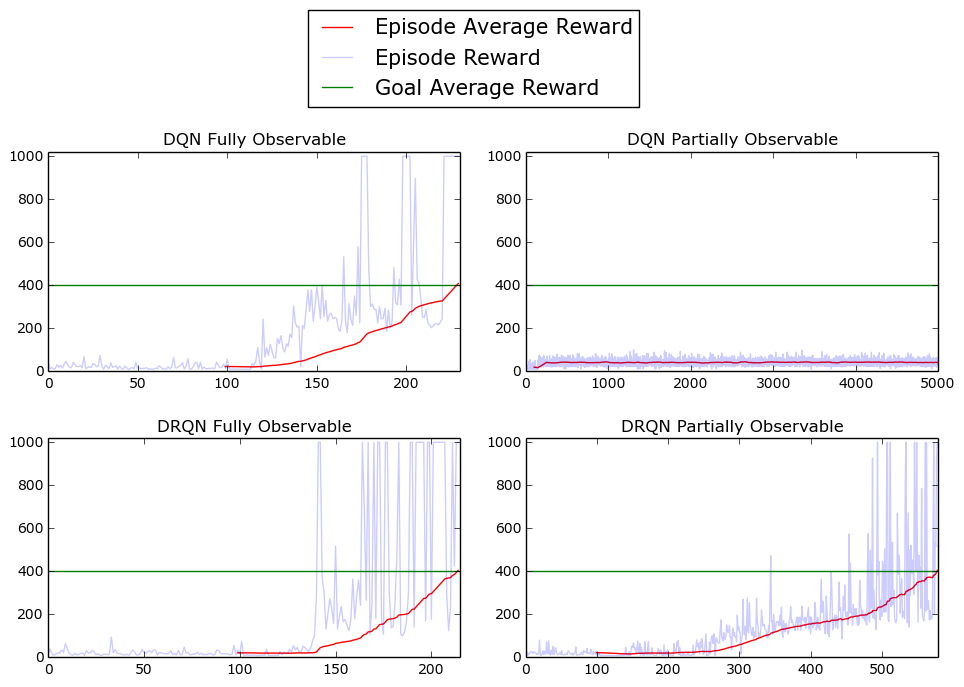

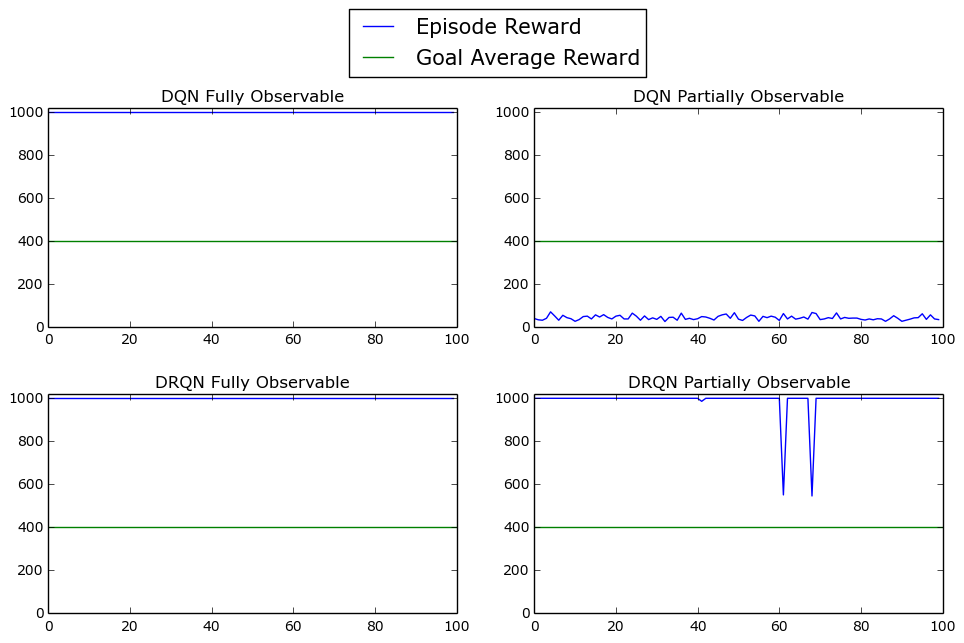

In [65]:
best_dqn_full = find_best_test_run('../DQN/CartPole_Regular/Data/')
print best_dqn_full
best_dqn_partial = find_best_test_run('../DQN/CartPole_Obscured/Data/')
print best_dqn_partial
best_drqn_full = find_best_test_run('../DRQN/CartPole_Regular/Data/')
print best_drqn_full
best_drqn_partial = find_best_test_run('../DRQN/CartPole_Obscured/Data/')
print best_drqn_partial
plot_best_train_runs(best_dqn_full, best_dqn_partial, best_drqn_full, best_drqn_partial, 400)
plot_best_test_runs(best_dqn_full, best_dqn_partial, best_drqn_full, best_drqn_partial, 400)